In [1]:
"""
1) Delivery_time -> Predict delivery time using sorting time 

Build a simple linear regression model by performing EDA and 
do necessary transformations and select the best model using R or Python.
"""

'\n1) Delivery_time -> Predict delivery time using sorting time \n\nBuild a simple linear regression model by performing EDA and \ndo necessary transformations and select the best model using R or Python.\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv('C:/Users/Ashwini/Desktop/ExcelRAssignments/Simple Linear Regression/delivery_time (1).csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.shape

(21, 2)

In [5]:
data1 = data.rename({'Delivery Time':'delivery_time' , 'Sorting Time':'sorting_time'}, axis = 1)
data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
C1 = data1.delivery_time
C1

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: delivery_time, dtype: float64

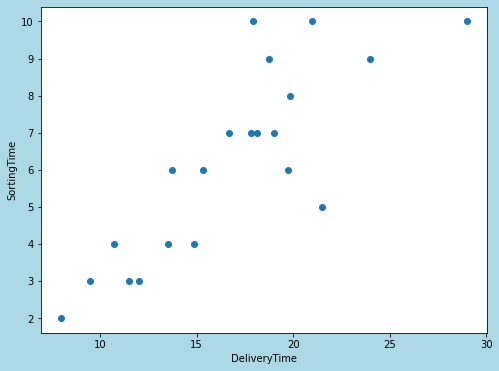

In [7]:
plt.figure(figsize = (8,6), facecolor = 'lightblue')
plt.scatter(data1['delivery_time'], data1['sorting_time'])
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')
plt.show()

In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [9]:
X = data1['delivery_time'].values.reshape(21,1)
Y = data1['sorting_time'].values.reshape(21,1)

In [10]:
#Simple Linear Regression Model

LR = LinearRegression()
#model = LR.fit(X, Y)
modelx = smf.ols('delivery_time~sorting_time', data = data1).fit()

In [11]:
modelx.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [12]:
modelx.rsquared

0.6822714748417231

In [13]:
predictions = modelx.predict()
predictions

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [14]:
pd.DataFrame({'delivery_time':X.flatten(),
              'sorting_time':Y.flatten(),
              'Predictions':predictions.flatten()})

,delivery_time,sorting_time,Predictions
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


C:\Users\Ashwini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

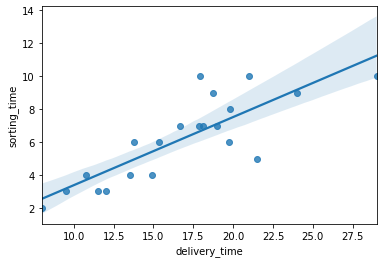

In [15]:
sns.regplot(data1['delivery_time'], data1['sorting_time'])

In [16]:
r2_score(data1['delivery_time'], predictions)

0.6822714748417231

In [17]:
modelx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        16:58:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2 = smf.ols("np.log(delivery_time)~np.log(sorting_time)", data = data1).fit()

In [19]:
model2.rsquared

0.77216134926874

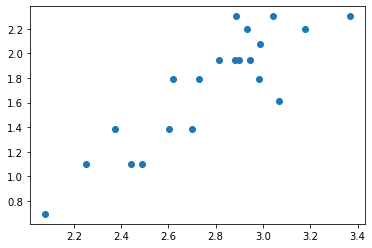

In [20]:
plt.scatter(np.log(data1['delivery_time']), np.log(data1['sorting_time']))

C:\Users\Ashwini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

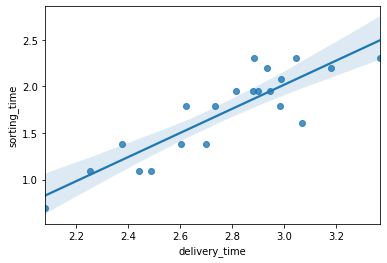

In [21]:
sns.regplot(np.log(data1['delivery_time']), np.log(data1['sorting_time']))

In [22]:
predictions = model2.predict()
predictions

array([3.1178331 , 2.57032892, 2.81260338, 3.05487783, 3.1178331 ,
       2.81260338, 2.90471185, 2.39843246, 3.1178331 , 3.05487783,
       2.98449984, 2.57032892, 2.90471185, 2.39843246, 2.39843246,
       2.57032892, 2.81260338, 2.90471185, 2.15615801, 2.90471185,
       2.70366218])

In [24]:
R2_Value = pd.DataFrame({"Original": modelx.rsquared,
              "Modelx": modelx.rsquared,
              "Model2": model2.rsquared}, index = [1])
R2_Value

,Original,Modelx,Model2
1,0.682271,0.682271,0.772161


In [ ]:
pd.DataFrame({"Original": C1, "predict":predictions})